In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/Users/kmarkov//Documents/final_df_3_stages_stand.csv")


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['3_stages'])  # Extract features excluding the label column 'PPG_GM','PPI_GM'

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

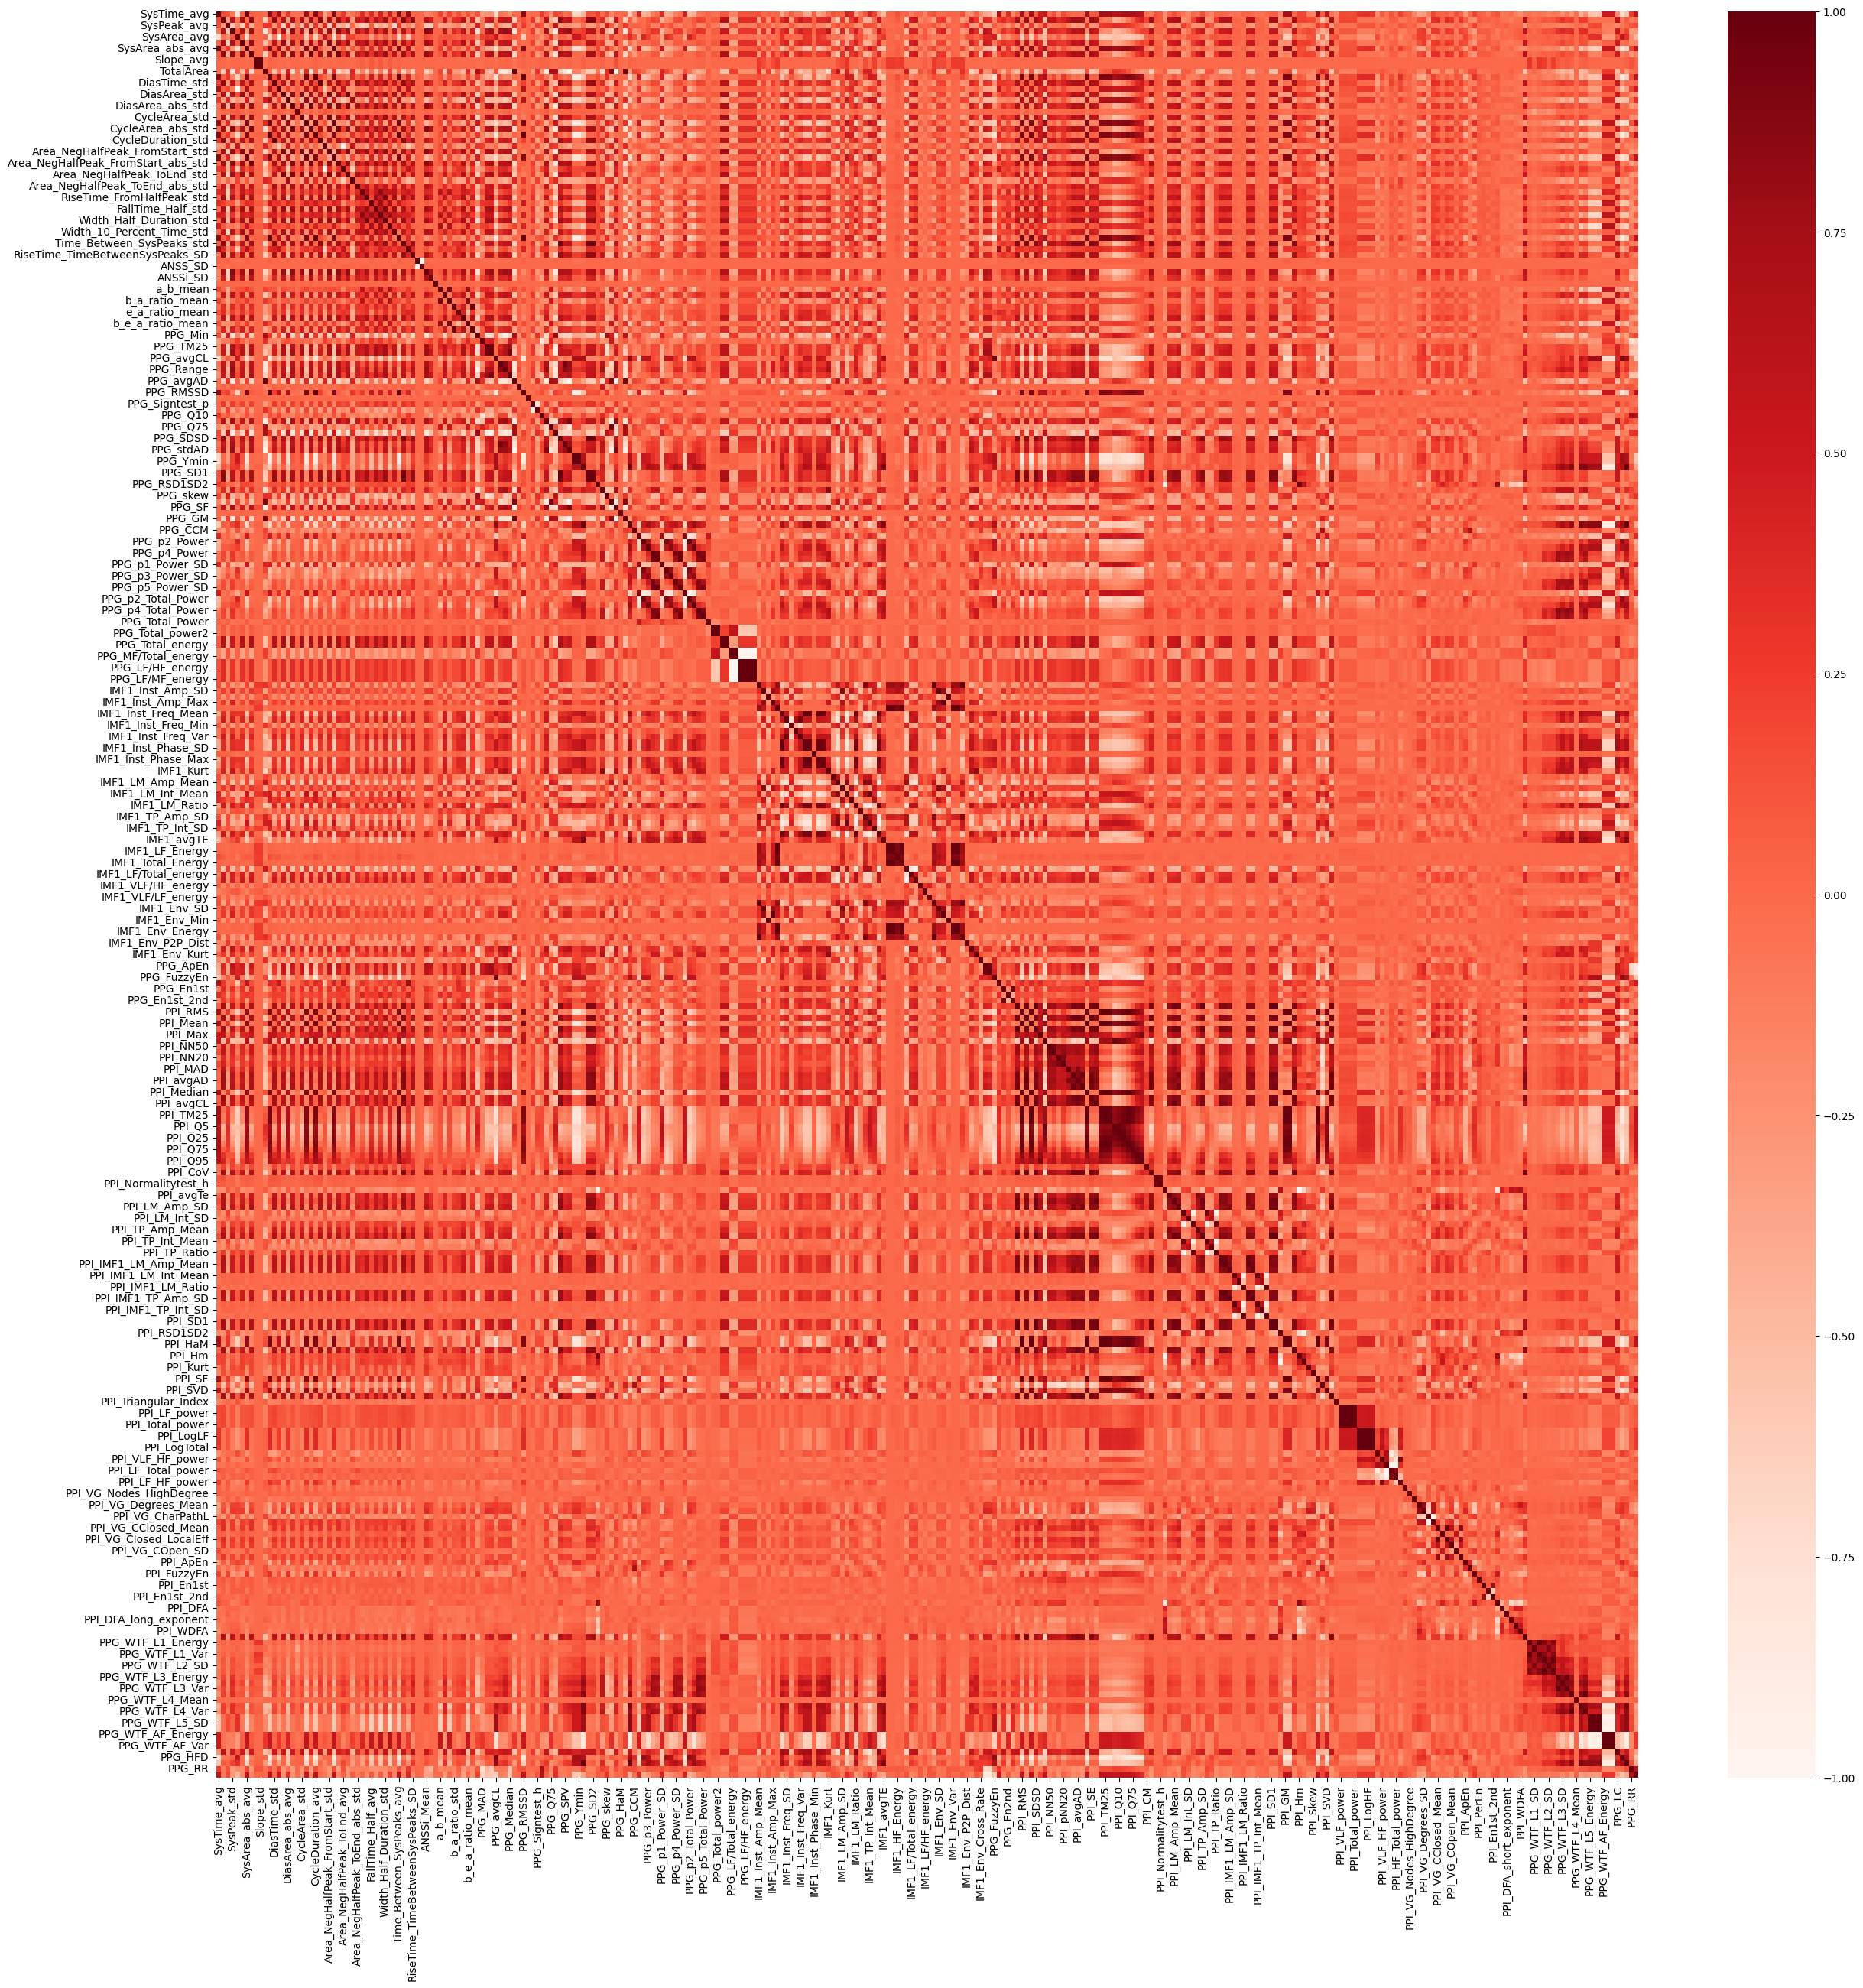

In [3]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [4]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [5]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [6]:
# Check NaNs

#df_revised = df
nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 20% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_VG_Degrees_S

In [7]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


# Prepare X and y

In [8]:
# Load subjects
df_subjects = pd.read_csv("/Users/kmarkov//Documents/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['3_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['3_stages']
groups = df_revised['SubjectID']



# Feature selection

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X, y)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X.columns[selected_features_mask]

print("Selected features:", selected_features)

Selected features: Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysArea_avg',
       'SysArea_std', 'SysArea_abs_avg', 'Slope_avg', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg', 'DiasArea_std', 'DiasArea_abs_avg',
       'CycleArea_std', 'CycleArea_abs_avg', 'Area_NegHalfPeak_FromStart_avg',
       'Area_NegHalfPeak_ToEnd_avg', 'Area_NegHalfPeak_ToEnd_abs_avg',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_avg',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'RiseTime_TimeBetweenSysPeaks_Mean',
       'RiseTime_TimeBetweenSysPeaks_SD', 'ANSS_Mean', 'ANSSi_Mean',
       'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std',
       'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPG_Min',
       'PPG_MAD', 'PPG_TM25', 'PPG_TM50', 'PPG_avgCL', 'PPG_Median', 'PPG_CM',
       'PPG_Q10', 'PPG_Q25', 'PPG_Q75', 'PPG_Q90', 'PPG_SDS

In [9]:
X_selected = X[['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysArea_avg',
       'SysArea_std', 'SysArea_abs_avg', 'Slope_avg', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg', 'DiasArea_std', 'DiasArea_abs_avg',
       'CycleArea_std', 'CycleArea_abs_avg', 'Area_NegHalfPeak_FromStart_avg',
       'Area_NegHalfPeak_ToEnd_avg', 'Area_NegHalfPeak_ToEnd_abs_avg',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_avg',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'RiseTime_TimeBetweenSysPeaks_Mean',
       'RiseTime_TimeBetweenSysPeaks_SD', 'ANSS_Mean', 'ANSSi_Mean',
       'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std',
       'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPG_Min',
       'PPG_MAD', 'PPG_TM25', 'PPG_TM50', 'PPG_avgCL', 'PPG_Median', 'PPG_CM',
       'PPG_Q10', 'PPG_Q25', 'PPG_Q75', 'PPG_Q90', 'PPG_SDSD', 'PPG_SPV',
       'PPG_stdAD', 'PPG_avgTe', 'PPG_kurt', 'PPG_skew', 'PPG_IQR', 'PPG_SF',
       'PPG_GM', 'PPG_p3_Power', 'PPG_p4_Power', 'PPG_p1_Power_SD',
       'PPG_p3_Power_SD', 'PPG_p4_Power_SD', 'PPG_p1_Total_Power',
       'PPG_p2_Total_Power', 'PPG_p3_Total_Power', 'PPG_p4_Total_Power',
       'IMF1_Inst_Freq_Mean', 'IMF1_LM_Int_Mean', 'IMF1_TP_Amp_SD',
       'IMF1_TP_Int_Mean', 'IMF1_TP_Int_SD', 'IMF1_avgTE', 'IMF1_Env_P2P_Dist',
       'PPG_ApEn', 'PPG_SampEn', 'PPG_PerEn', 'PPG_En1st', 'PPG_En2nd',
       'PPI_RMS', 'PPI_Min', 'PPI_pNN20', 'PPI_Q90', 'PPI_Q95',
       'PPI_IMF1_avgTe', 'PPI_RSD1SD2', 'PPI_Hc', 'PPI_Skew', 'PPI_SVD',
       'PPI_VG_CClosed_SD', 'PPI_FuzzyEn', 'PPI_HFD', 'PPI_PDFA', 'PPI_WDFA',
       'PPG_WTF_L4_Energy', 'PPG_WTF_L4_SD', 'PPG_WTF_L5_Energy', 'PPG_LC',
       'PPG_HFD', 'PPG_RR', 'PPG_DET']]

In [10]:
X_selected = X[selected_features]
X_selected

,SysTime_avg,SysTime_std,SysPeak_avg,SysArea_avg,SysArea_std,SysArea_abs_avg,Slope_avg,TotalArea,DiasTime_avg,DiasArea_avg,...,PPI_HFD,PPI_PDFA,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0.243075,0.106977,2.051287,-1.285312,14.791261,0.190149,0.129524,20.185956,0.665483,1.261417,...,1.840314,1.408947,1.041127,73.786172,0.544357,469.265490,56.679685,1.596500,0.103262,0.916861
1,0.343277,0.225440,1.927268,2.661957,17.248446,0.190526,0.250397,18.963432,0.897964,-2.347344,...,1.670130,0.518060,1.191702,124.451367,0.706797,986.855721,59.669821,1.481480,0.100278,0.961463
2,0.274200,0.101530,2.242864,0.956881,15.603188,0.206661,0.152634,22.063562,0.709604,-0.729983,...,1.935544,0.171287,0.566286,47.301892,0.435842,452.286898,61.623213,1.512300,0.070013,0.889709
3,0.437240,0.398992,2.824896,-1.905432,15.568619,0.304404,0.299215,21.087311,0.984896,2.499454,...,1.842306,0.499770,0.691065,357.419869,1.197743,748.970794,62.408353,1.531390,0.075477,0.864056
4,0.274282,0.135000,2.913433,1.484555,19.700900,0.274228,0.094563,25.268359,0.757390,-1.118548,...,1.902181,0.976507,1.272573,51.561563,0.455048,495.221854,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85537,0.457332,0.147955,2.894850,0.939364,7.744200,0.444941,0.156556,25.575405,1.111178,-2.118725,...,1.935976,0.614931,0.574621,12.749257,0.226207,291.749987,50.156012,1.312859,0.086904,0.944182
85538,0.418870,0.159254,2.790856,3.364588,9.194997,0.412621,0.245752,25.140178,1.088942,-2.414546,...,2.031091,0.607741,0.574901,14.531636,0.241577,238.542476,51.241862,1.329070,0.086235,0.943974
85539,0.418692,0.121094,2.838916,3.748585,6.014400,0.411671,0.145413,25.719602,1.080729,-6.714564,...,2.028758,0.491286,0.762822,13.286614,0.230992,255.100137,49.838657,1.319159,0.101377,0.951243
85540,0.412946,0.169847,2.848124,2.600567,7.562719,0.405593,0.140956,25.362439,1.034877,-3.052372,...,2.053174,1.020100,1.026078,13.945365,0.236626,336.559393,50.857749,1.367742,0.084736,0.934705


# Hyperparameter tuning

In [11]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y, groups, test_size=0.5, random_state=42, stratify = y)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 18, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 367}
Best score:  0.1776916655918296


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)


# Define the parameter grid based on the results of random search 
param_grid_rf = {
    'classifier__bootstrap': [False, True],
    'classifier__max_depth': [5, 18],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__min_samples_split': [4, 5],
    'classifier__n_estimators': [367, 400, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y, groups=groups),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 18, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 500}
Best score:  0.18548761528584978


# Model training

## 5-fold CV

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=18,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)
    
    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)
    

# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)


Test set distribution: 1    10467
0     3830
2     2938
Name: 3_stages, dtype: int64
Test set distribution: 1    10437
0     3424
2     2718
Name: 3_stages, dtype: int64
Test set distribution: 1    11358
2     3006
0     2914
Name: 3_stages, dtype: int64
Test set distribution: 1    11882
2     2801
0     2560
Name: 3_stages, dtype: int64
Test set distribution: 1    10803
0     3400
2     3004
Name: 3_stages, dtype: int64
Accuracy       0.648450
Sensitivity    0.648450
Specificity    0.711893
Precision      0.648450
F1 Score       0.648450
MCC            0.202625
dtype: float64
Accuracy       0.010875
Sensitivity    0.010875
Specificity    0.013404
Precision      0.010875
F1 Score       0.010875
MCC            0.055727
dtype: float64
Final Confusion Matrix:
 [[ 5184 10757   187]
 [ 4519 49791   637]
 [ 1068 12915   484]]


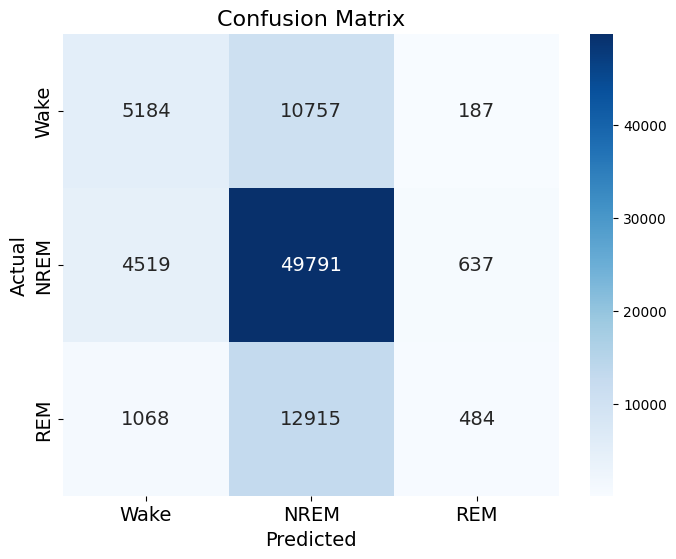

In [17]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'NREM', 'REM'], yticklabels=['Wake', 'NREM', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Define the number of classes
n_classes = 3

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [21]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv5 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2]
})

# Adding a column for the overall importance (mean)
importances_df_cv5['Overall Importance (Mean)'] = importances_df_cv5[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv5

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Overall Importance (Mean)
0,SysTime_avg,0.008285,0.010035,0.011652,0.009991
1,SysTime_std,0.007359,0.008611,0.010026,0.008665
2,SysPeak_avg,0.009897,0.009440,0.009749,0.009695
3,SysArea_avg,0.008327,0.009919,0.011397,0.009881
4,SysArea_std,0.007692,0.008425,0.007874,0.007997
...,...,...,...,...,...
94,PPG_WTF_L5_Energy,0.007585,0.007720,0.008038,0.007781
95,PPG_LC,0.023776,0.012844,0.011325,0.015982
96,PPG_HFD,0.009839,0.010416,0.009038,0.009764
97,PPG_RR,0.007381,0.008368,0.008585,0.008111


In [22]:
importances_df_cv5.to_csv('importances_df_cv5_3_stages.csv')

## 10-fold CV

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)


Test set distribution: 1    5333
2    1612
0    1548
Name: 3_stages, dtype: int64
Test set distribution: 1    4946
0    2111
2    1419
Name: 3_stages, dtype: int64
Test set distribution: 1    5263
2    1601
0    1448
Name: 3_stages, dtype: int64
Test set distribution: 1    5765
2    1438
0    1017
Name: 3_stages, dtype: int64
Test set distribution: 1    5473
2    1392
0    1352
Name: 3_stages, dtype: int64
Test set distribution: 1    5051
0    1922
2    1208
Name: 3_stages, dtype: int64
Test set distribution: 1    5589
0    1859
2    1490
Name: 3_stages, dtype: int64
Test set distribution: 1    6025
2    1525
0    1415
Name: 3_stages, dtype: int64
Test set distribution: 1    5630
0    1865
2    1344
Name: 3_stages, dtype: int64
Test set distribution: 1    5872
0    1591
2    1438
Name: 3_stages, dtype: int64
Accuracy       0.647942
Sensitivity    0.647942
Specificity    0.708851
Precision      0.647942
F1 Score       0.647942
MCC            0.193257
dtype: float64
Accuracy       0.0303

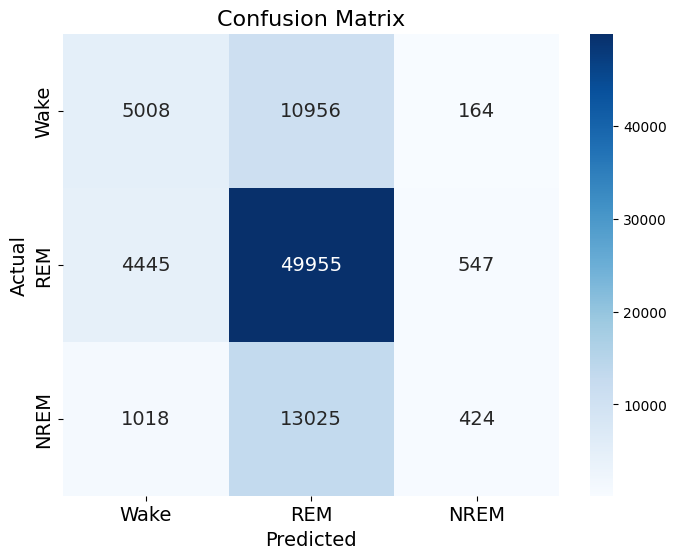

In [24]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'REM', 'NREM'], yticklabels=['Wake', 'REM', 'NREM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Define the number of classes
n_classes = 3

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv10 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [26]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv10 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv10[0],
    'Class 1 Importances': average_importances_cv10[1],
    'Class 2 Importances': average_importances_cv10[2]
})

# Adding a column for the overall importance (mean)
importances_df_cv10['Overall Importance (Mean)'] = importances_df_cv10[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv10

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Overall Importance (Mean)
0,SysTime_avg,0.008161,0.010010,0.011624,0.009932
1,SysTime_std,0.007386,0.008681,0.010085,0.008717
2,SysPeak_avg,0.009914,0.009335,0.009774,0.009675
3,SysArea_avg,0.008379,0.009906,0.011398,0.009895
4,SysArea_std,0.007703,0.008473,0.007951,0.008042
...,...,...,...,...,...
94,PPG_WTF_L5_Energy,0.007495,0.007705,0.008020,0.007740
95,PPG_LC,0.023684,0.012896,0.011526,0.016035
96,PPG_HFD,0.009783,0.010340,0.009058,0.009727
97,PPG_RR,0.007417,0.008350,0.008439,0.008069


In [27]:
importances_df_cv10.to_csv('importances_df_cv10_rus.csv')

## 20-fold CV

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)


Test set distribution: 1    2784
0    1150
2     551
Name: 3_stages, dtype: int64
Test set distribution: 1    2306
0    1314
2     834
Name: 3_stages, dtype: int64
Test set distribution: 1    2717
0     830
2     728
Name: 3_stages, dtype: int64
Test set distribution: 1    2892
2     867
0     402
Name: 3_stages, dtype: int64
Test set distribution: 1    2483
0     992
2     674
Name: 3_stages, dtype: int64
Test set distribution: 1    2410
0    1140
2     517
Name: 3_stages, dtype: int64
Test set distribution: 1    2718
0    1297
2     768
Name: 3_stages, dtype: int64
Test set distribution: 1    2607
0     842
2     608
Name: 3_stages, dtype: int64
Test set distribution: 1    3074
0    1064
2     681
Name: 3_stages, dtype: int64
Test set distribution: 1    2834
0    1303
2     578
Name: 3_stages, dtype: int64
Test set distribution: 1    3170
2    1084
0     602
Name: 3_stages, dtype: int64
Test set distribution: 1    2994
2     716
0     364
Name: 3_stages, dtype: int64
Test set distrib

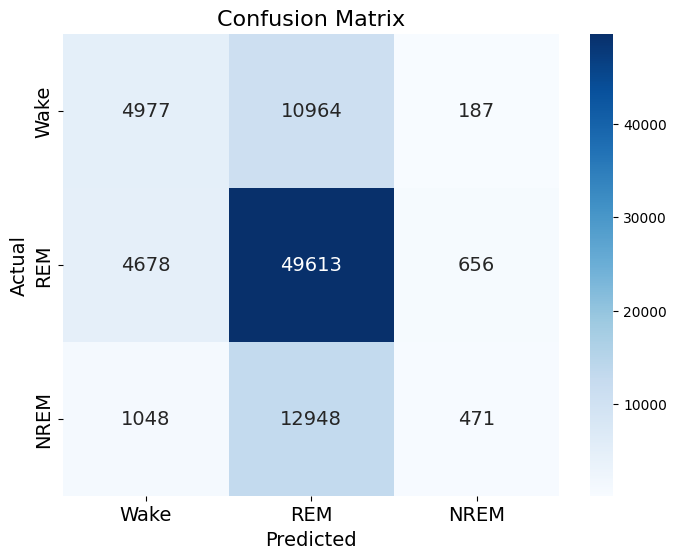

In [29]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'REM', 'NREM'], yticklabels=['Wake', 'REM', 'NREM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Define the number of classes
n_classes = 3

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv20 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [31]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv20 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv20[0],
    'Class 1 Importances': average_importances_cv20[1],
    'Class 2 Importances': average_importances_cv20[2]
})

# Adding a column for the overall importance (mean)
importances_df_cv20['Overall Importance (Mean)'] = importances_df_cv20[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv20

importances_df_cv20.to_csv('importances_df_cv20.csv')


# Feature importances

In [32]:
# Assuming importances_df_cv10, importances_df_cv5, importances_df_cv20 are already defined
# Step 1: Merge the dataframes on the 'Feature' column
merged_df = pd.merge(importances_df_cv10, importances_df_cv5, on='Feature', suffixes=('_cv10', '_cv5'))
merged_df = pd.merge(merged_df, importances_df_cv20, on='Feature')

# Step 2: Calculate the average importance for each class across the three validation methods
merged_df['Class 0 Average'] = merged_df[['Class 0 Importances_cv10', 'Class 0 Importances_cv5', 'Class 0 Importances']].mean(axis=1)
merged_df['Class 1 Average'] = merged_df[['Class 1 Importances_cv10', 'Class 1 Importances_cv5', 'Class 1 Importances']].mean(axis=1)
merged_df['Class 2 Average'] = merged_df[['Class 2 Importances_cv10', 'Class 2 Importances_cv5', 'Class 2 Importances']].mean(axis=1)

# Step 3: Calculate the overall mean importance from the averages of each class
merged_df['Overall Importance (Mean)'] = merged_df[['Class 0 Average', 'Class 1 Average', 'Class 2 Average']].mean(axis=1)

# Optionally, create a DataFrame to view or export just the features and their importances
final_df = merged_df[['Feature', 'Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Overall Importance (Mean)']]
final_df

,Feature,Class 0 Average,Class 1 Average,Class 2 Average,Overall Importance (Mean)
0,SysTime_avg,0.008191,0.010026,0.011646,0.009954
1,SysTime_std,0.007386,0.008647,0.010082,0.008705
2,SysPeak_avg,0.009881,0.009395,0.009780,0.009685
3,SysArea_avg,0.008352,0.009908,0.011388,0.009883
4,SysArea_std,0.007692,0.008447,0.007922,0.008020
...,...,...,...,...,...
94,PPG_WTF_L5_Energy,0.007561,0.007708,0.008029,0.007766
95,PPG_LC,0.023821,0.012867,0.011477,0.016055
96,PPG_HFD,0.009795,0.010370,0.009035,0.009733
97,PPG_RR,0.007399,0.008362,0.008491,0.008084


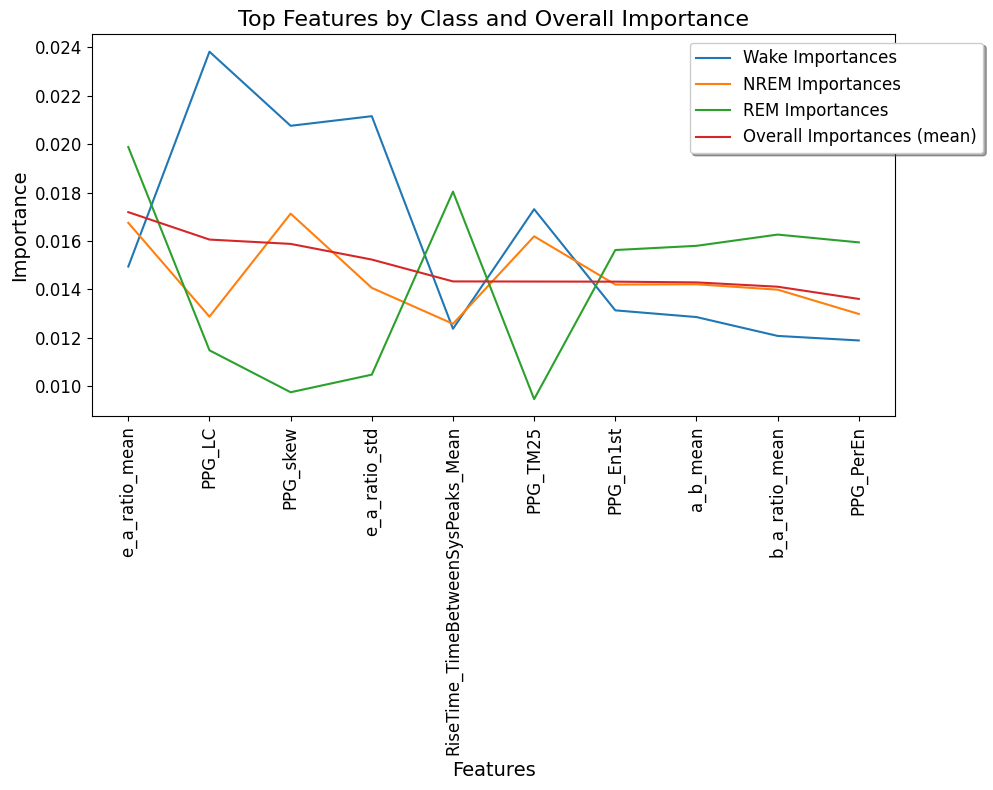

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 for each class
top_class_0 = final_df.nlargest(5, 'Class 0 Average')['Feature']
top_class_1 = final_df.nlargest(5, 'Class 1 Average')['Feature']
top_class_2 = final_df.nlargest(5, 'Class 2 Average')['Feature']
top_overall = final_df.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = final_df[final_df['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Average' else label for label in labels]
new_labels = ['NREM Importances' if label == 'Class 1 Average' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 2 Average' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()


In [34]:
# Select the top 5 features for each class and overall
top_features_class_0 = final_df.nlargest(5, 'Class 0 Average')
top_features_class_1 = final_df.nlargest(5, 'Class 1 Average')
top_features_class_2 = final_df.nlargest(5, 'Class 2 Average')
top_features_overall = final_df.nlargest(5, 'Overall Importance (Mean)')

# Reset index to get the feature names in a column (if they are set as the index)
top_features_class_0 = top_features_class_0.reset_index()
top_features_class_1 = top_features_class_1.reset_index()
top_features_class_2 = top_features_class_2.reset_index()
top_features_overall = top_features_overall.reset_index()

# Combine the DataFrames and melt for plotting
top_features_combined = pd.concat([
    top_features_class_0.assign(Class='Wake').melt(id_vars=['Feature', 'Class'], value_vars=['Class 0 Average'], value_name='Importance'),
    top_features_class_1.assign(Class='NREM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 1 Average'], value_name='Importance'),
    top_features_class_2.assign(Class='REM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 2 Average'], value_name='Importance'),
    top_features_overall.assign(Class='Overall').melt(id_vars=['Feature', 'Class'], value_vars=['Overall Importance (Mean)'], value_name='Importance')
])


# Map overall importance to each feature
overall_importance_map = top_features_overall.set_index('Feature')['Overall Importance (Mean)'].to_dict()
top_features_combined['Overall Importance (Mean)'] = top_features_combined['Feature'].map(overall_importance_map)

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order
top_features_combined_sorted = top_features_combined.sort_values(by='Overall Importance (Mean)', ascending=False)

# Print sorted DataFrame
top_features_combined_sorted



,Feature,Class,variable,Importance,Overall Importance (Mean)
4,e_a_ratio_mean,Wake,Class 0 Average,0.014939,0.017189
1,e_a_ratio_mean,NREM,Class 1 Average,0.016748,0.017189
0,e_a_ratio_mean,REM,Class 2 Average,0.019880,0.017189
0,e_a_ratio_mean,Overall,Overall Importance (Mean),0.017189,0.017189
0,PPG_LC,Wake,Class 0 Average,0.023821,0.016055
1,PPG_LC,Overall,Overall Importance (Mean),0.016055,0.016055
2,PPG_skew,Wake,Class 0 Average,0.020758,0.015876
0,PPG_skew,NREM,Class 1 Average,0.017127,0.015876
2,PPG_skew,Overall,Overall Importance (Mean),0.015876,0.015876
1,e_a_ratio_std,Wake,Class 0 Average,0.021156,0.015228


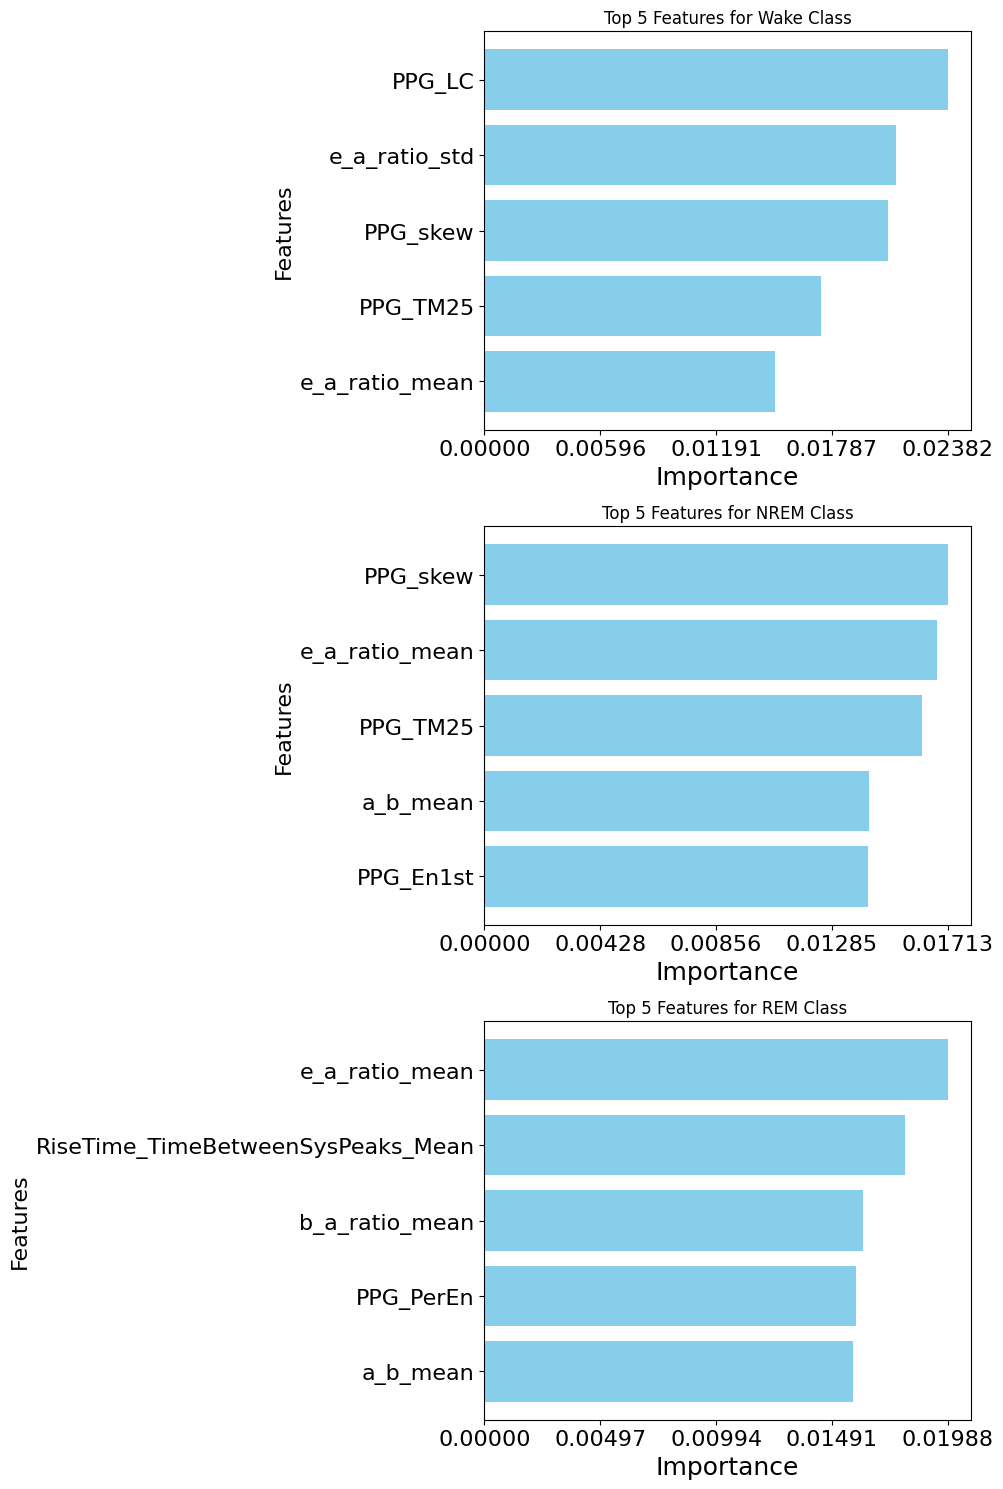

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'top_features_combined_sorted' is already your DataFrame

# Filter out rows that are for 'Overall' class
df = top_features_combined_sorted[top_features_combined_sorted['Class'] != 'Overall']

# Select only the necessary columns and rows that are not overall importance
df = df[['Feature', 'Class', 'Importance']]

# We will create a plot for each class with their top 5 features
classes = df['Class'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(classes), ncols=1, figsize=(10, 5 * len(classes)))

for i, cls in enumerate(classes):
    # Get top 5 features for the class
    top_features = df[df['Class'] == cls].nlargest(5, 'Importance')
    
    # Plotting
    ax = axes[i] if len(classes) > 1 else axes
    ax.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    ax.set_title(f'Top 5 Features for {cls} Class')
    ax.set_xlabel('Importance', fontsize = 18)
    ax.set_ylabel('Features', fontsize = 16)
    ax.invert_yaxis()  # To display the highest importance at the top

     # Adjusting x-ticks
    max_importance = top_features['Importance'].max()
    ticks = np.linspace(0, max_importance, num=5)  # Adjust 'num' to change the number of ticks
    # Increase the size of the tick labels
    ax.set_xticks(ticks)
    ax.set_xticklabels([f"{x:.5f}" for x in ticks])  # Adjust format as necessary
    ax.tick_params(axis='x', labelsize=16)  # Increase x-axis tick label size
    ax.tick_params(axis='y', labelsize=16)  # Increase y-axis tick label size

plt.tight_layout()
plt.show()



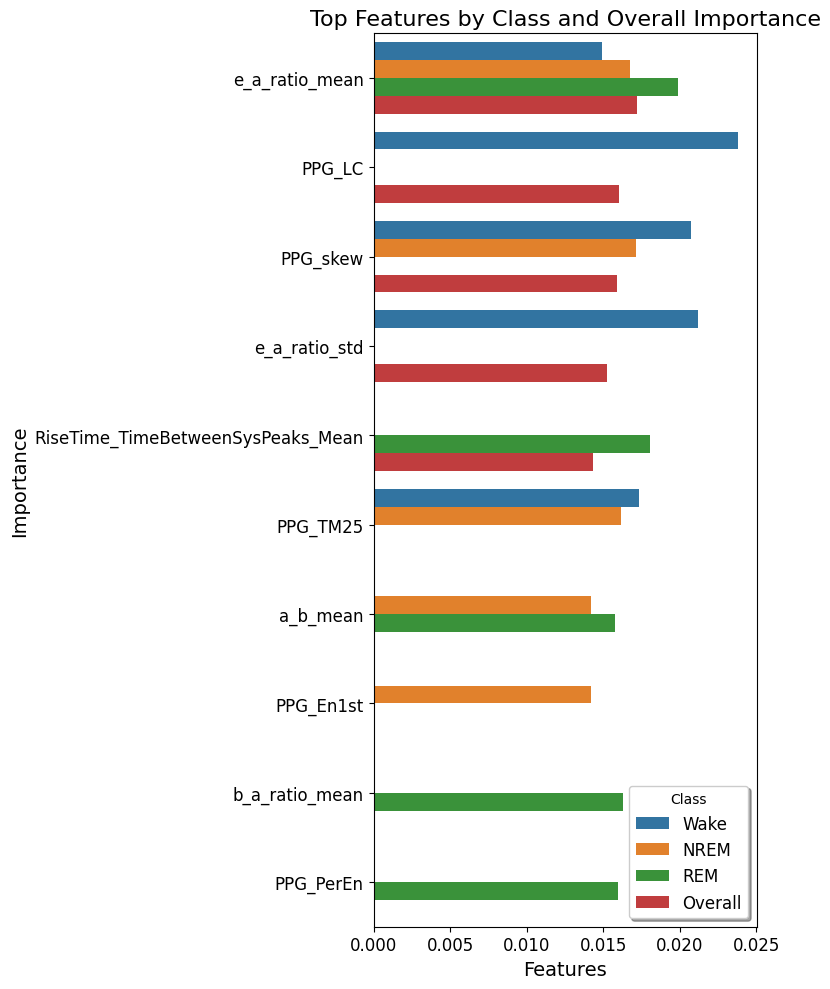

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with the combined DataFrame
plt.figure(figsize=(8, 10))
barplot = sns.barplot(data=top_features_combined_sorted, x='Importance', y='Feature', hue='Class')

# Define a custom palette from Seaborn's "bright" palette
bright_palette = sns.color_palette()
palette = {
    "Wake": bright_palette[0],  # blue
    "REM": bright_palette[2],  # green
    "NREM": bright_palette[1],  # orange
    "Overall": bright_palette[3]  # red
}

# Improve the aesthetics and legibility of the plot
plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend to match the desired order and colors
handles, labels = barplot.get_legend_handles_labels()
desired_order = ['Wake', 'NREM','REM', 'Overall']
ordered_handles = [handles[labels.index(lbl)] for lbl in desired_order]

# Create a new legend with the desired order and colors
plt.legend(ordered_handles, desired_order, title='Class', fontsize=12, frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

In [36]:
feature_names = top_features_combined_sorted['Feature'].unique()

In [37]:
feature_names

array(['e_a_ratio_mean', 'PPG_LC', 'PPG_skew', 'e_a_ratio_std',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'PPG_TM25', 'a_b_mean',
       'PPG_En1st', 'b_a_ratio_mean', 'PPG_PerEn'], dtype=object)

In [44]:
top_features = X[['e_a_ratio_mean', 'PPG_LC', 'PPG_skew', 'e_a_ratio_std',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'PPG_TM25', 'a_b_mean',
       'PPG_En1st', 'b_a_ratio_mean', 'PPG_PerEn']]

C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_36652\461525181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = y # Add the class labels


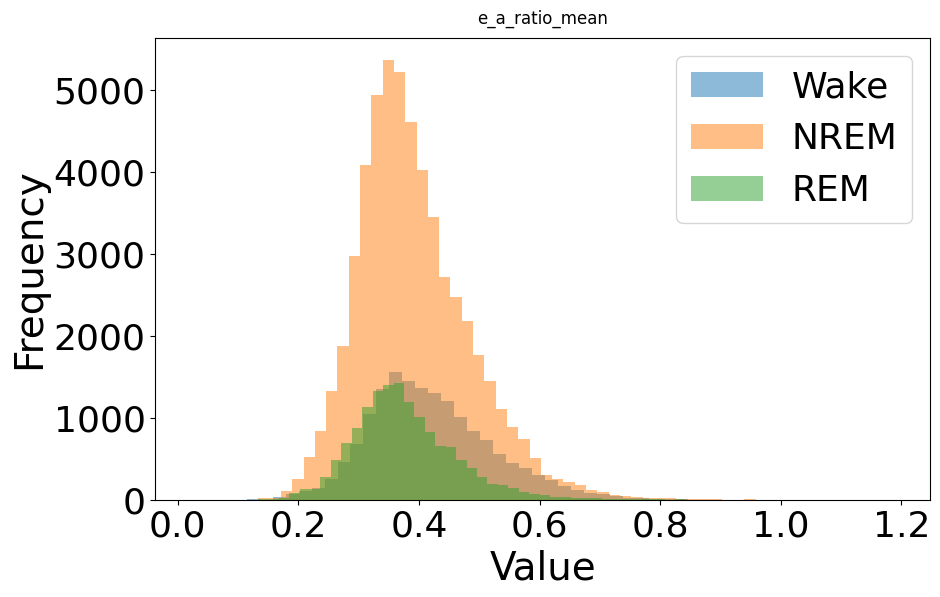

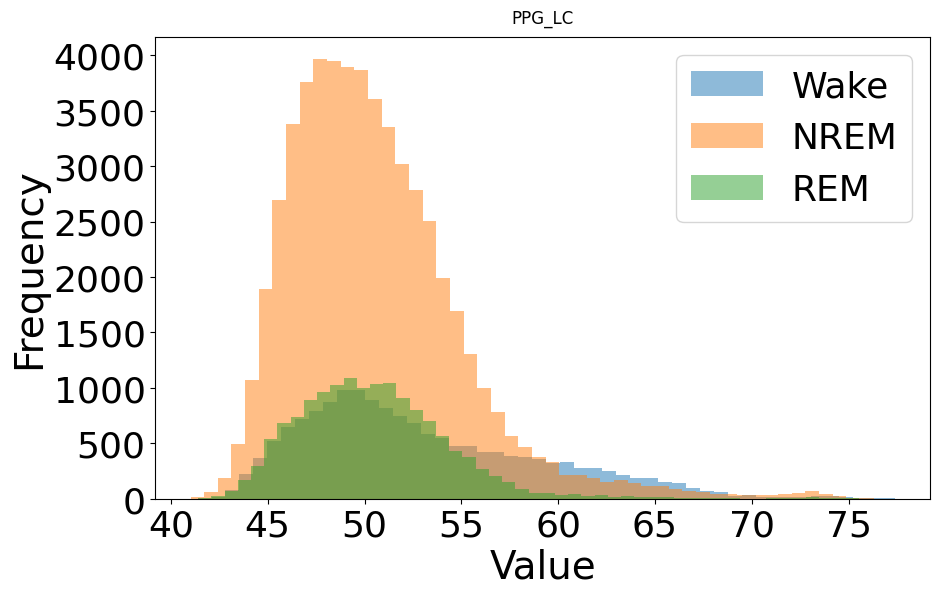

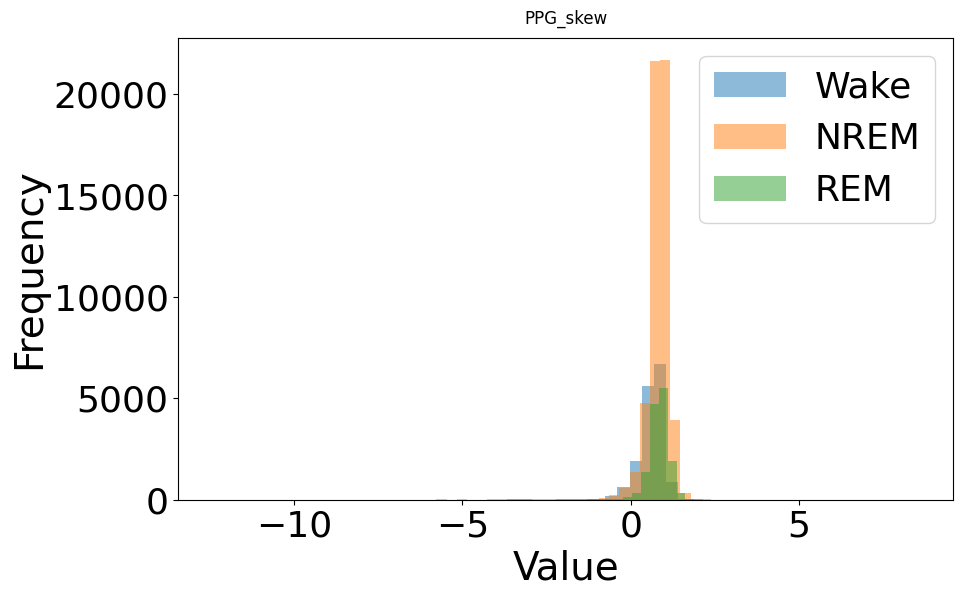

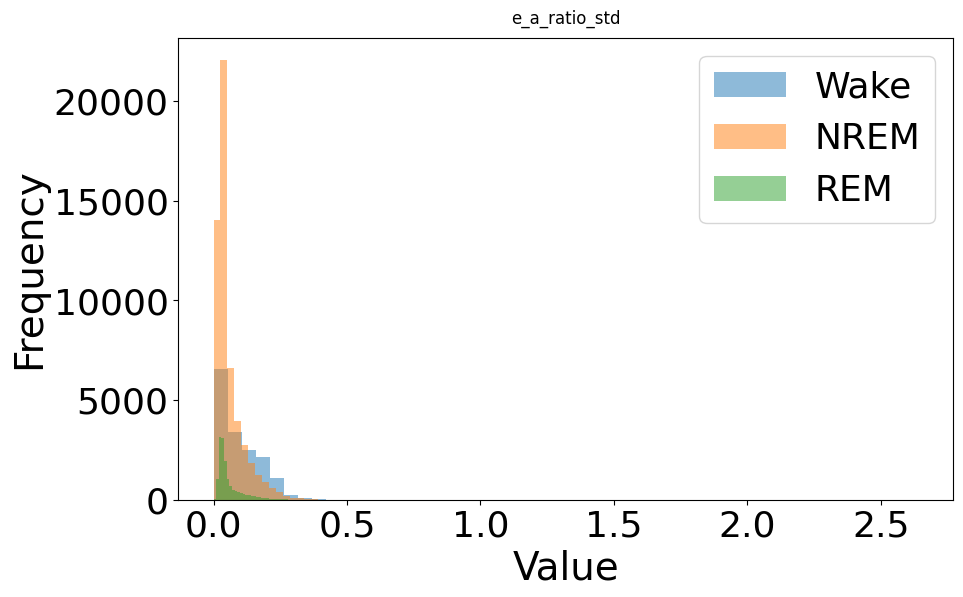

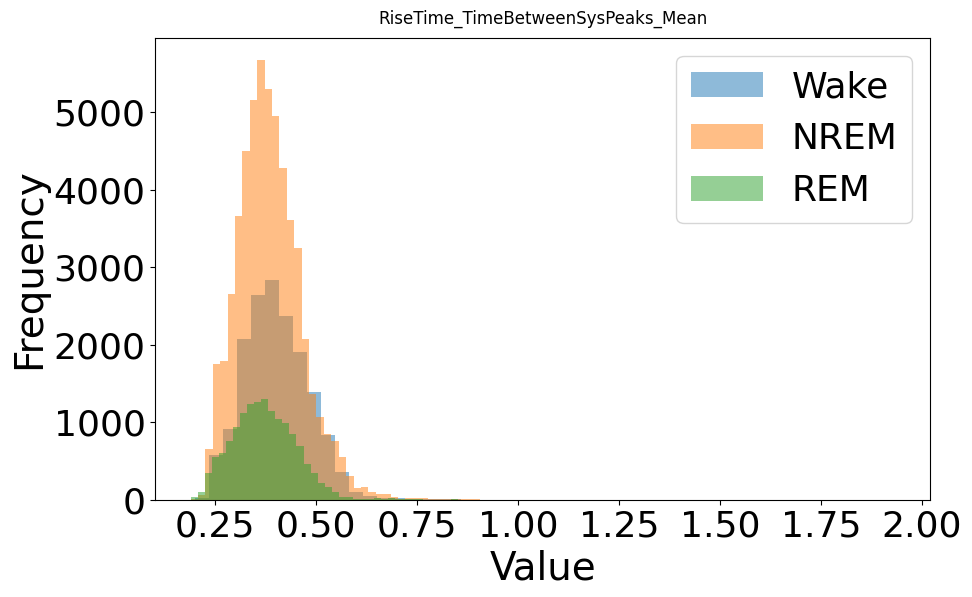

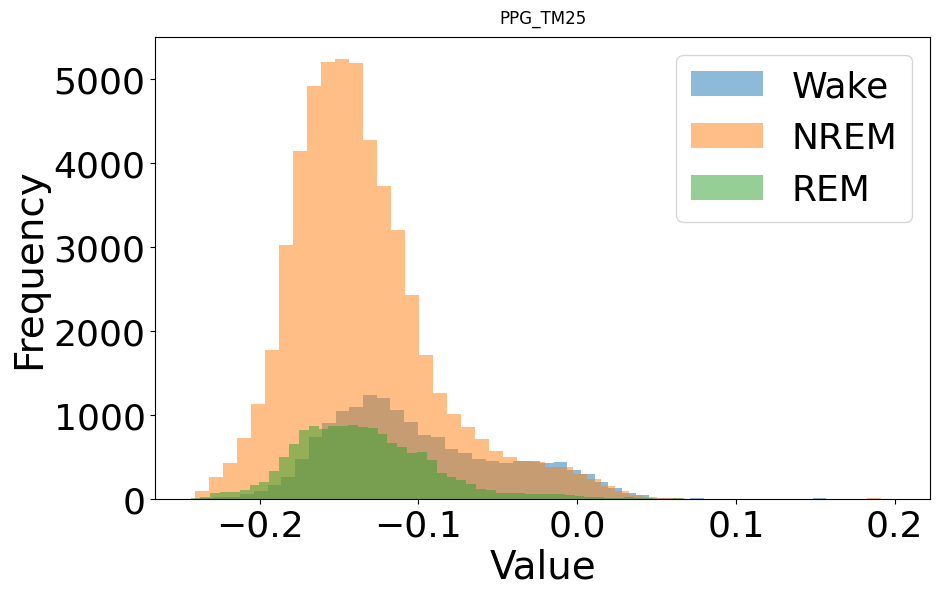

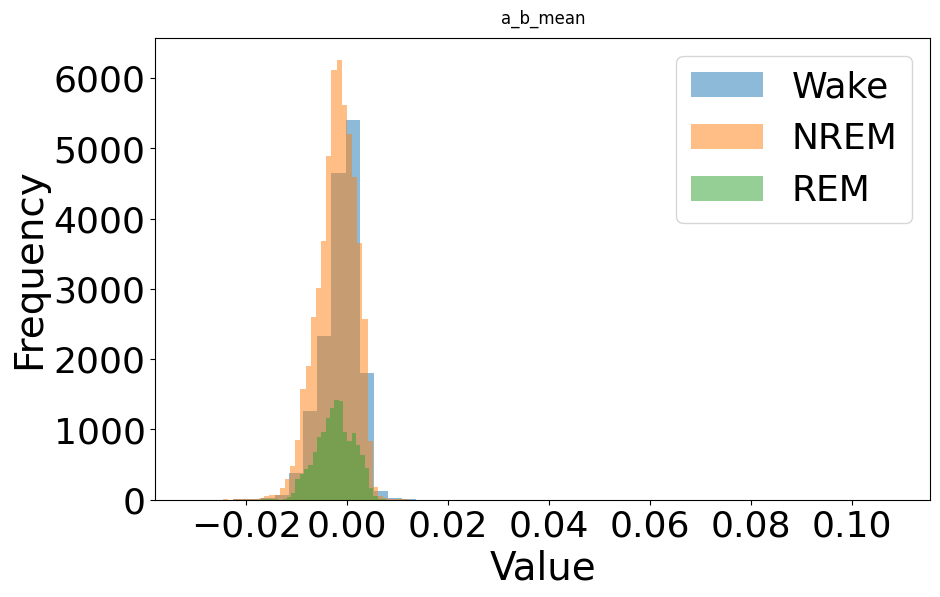

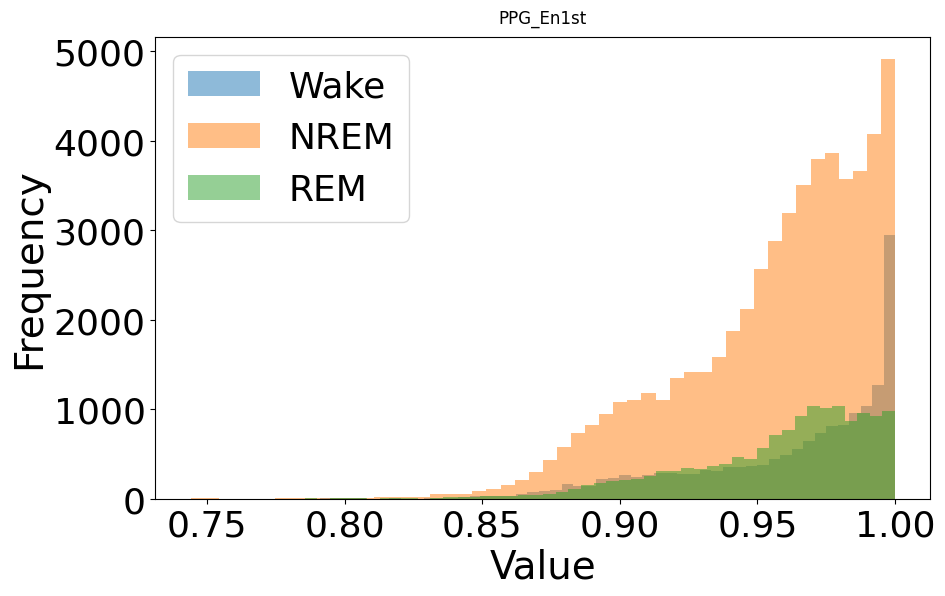

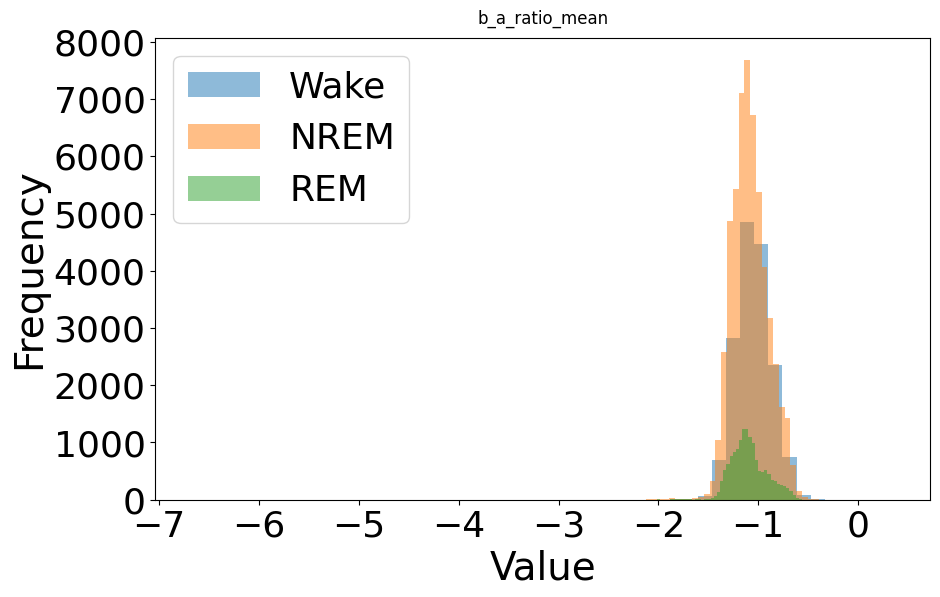

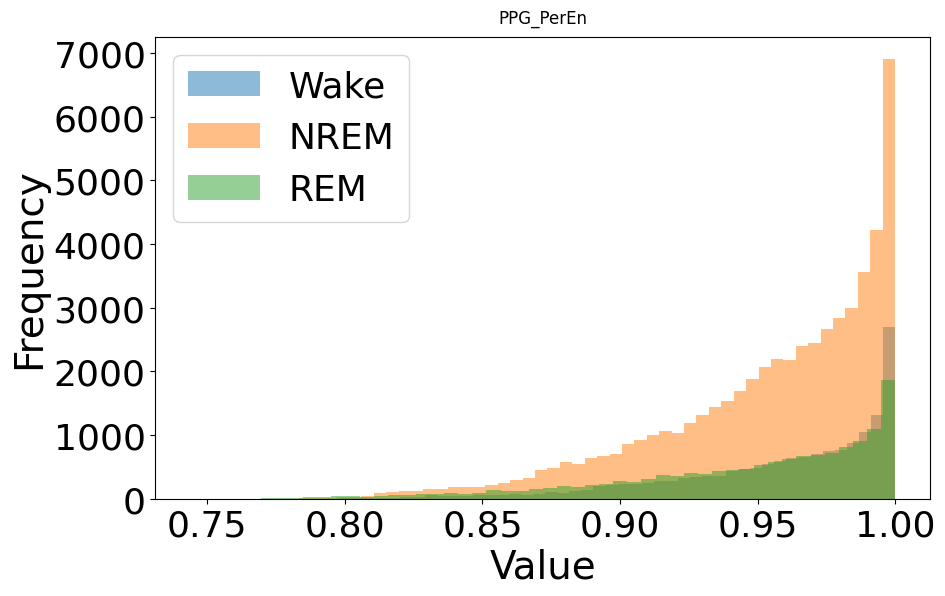

In [45]:
# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "NREM",
    2: "REM"
}

# Plot histograms for each feature
# Assuming 'top_features' DataFrame and 'y_resampled' Series are already defined
top_features['class'] = y # Add the class labels

# Exclude the 'class' column when getting feature names
feature_names = top_features.drop(columns='class').columns

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Get unique class values from the 'class' column
    for class_value in np.unique(top_features['class']):
        # Subset the data for the current class
        subset = top_features[top_features['class'] == class_value]
        # Plot histogram and use the class_labels dictionary to get the correct label
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'{feature}', pad = 10)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.legend(fontsize = 26)
    plt.xticks (fontsize = 26)
    plt.yticks (fontsize = 26)

    plt.show()


C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_36652\4189701632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = top_features['class'].map(class_mapping)


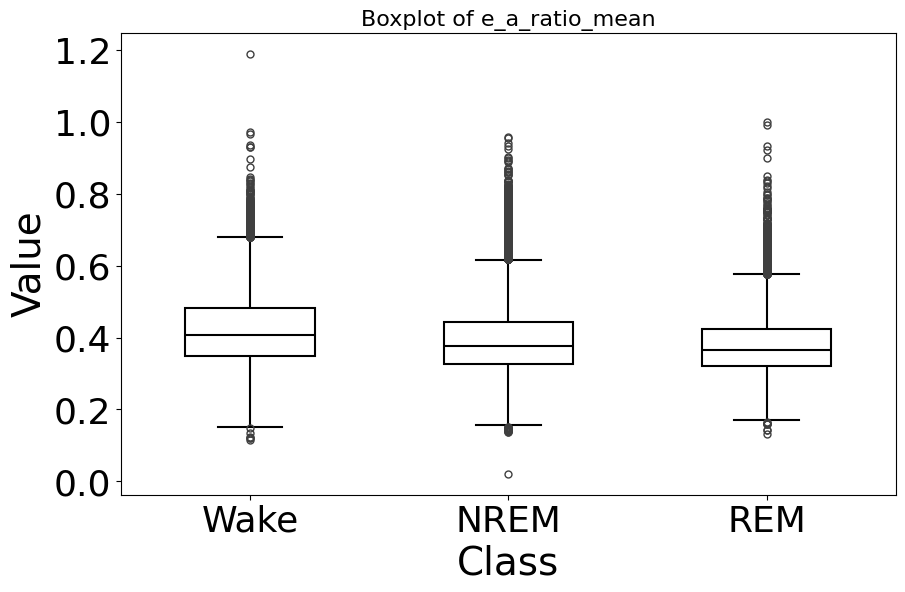

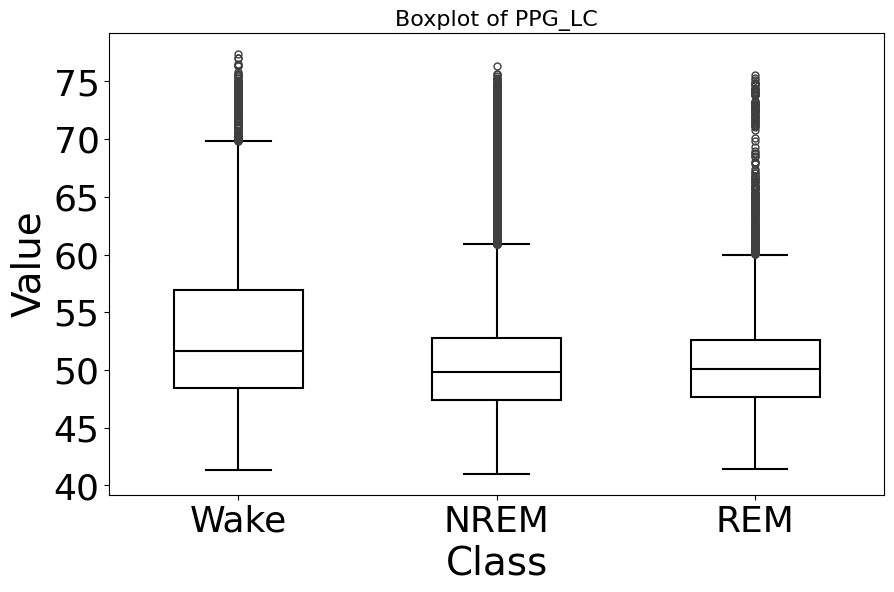

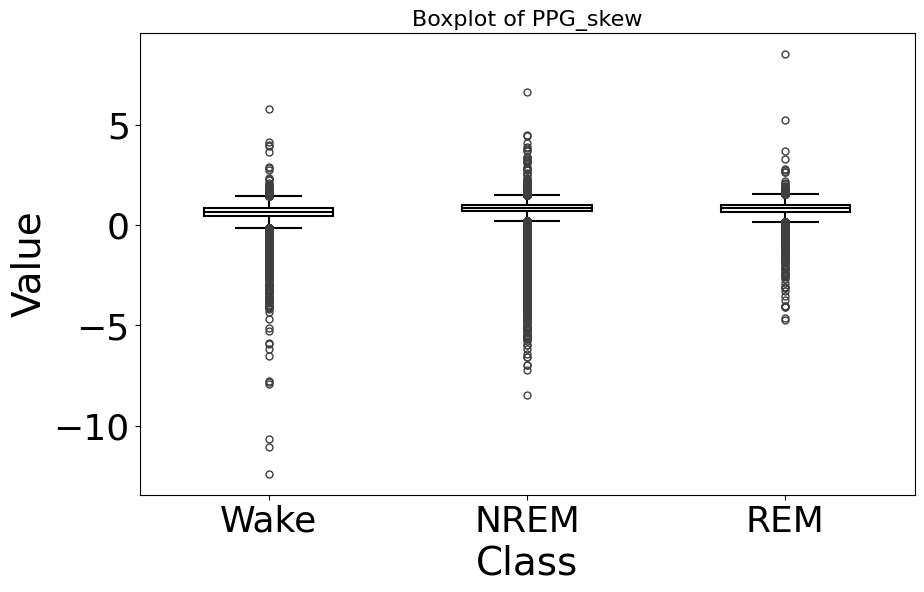

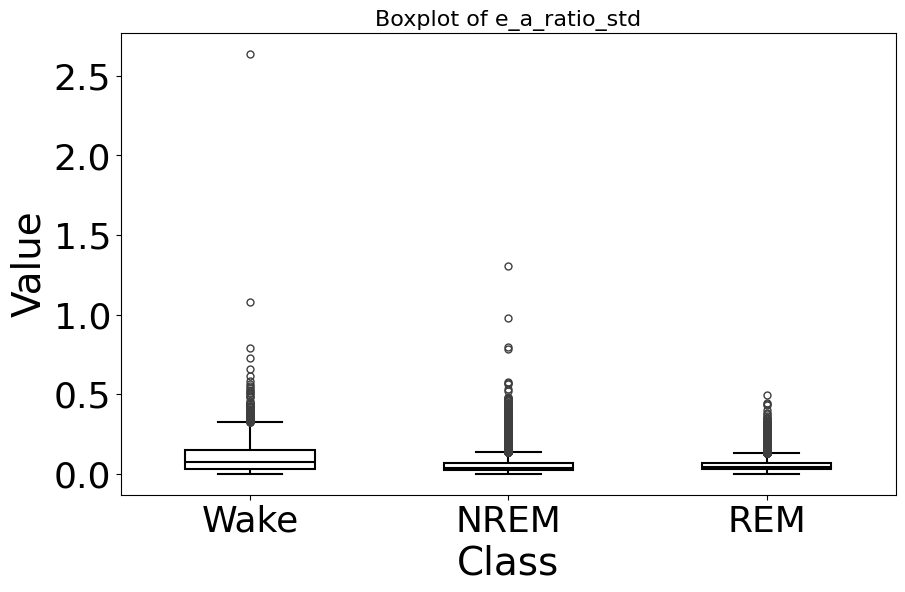

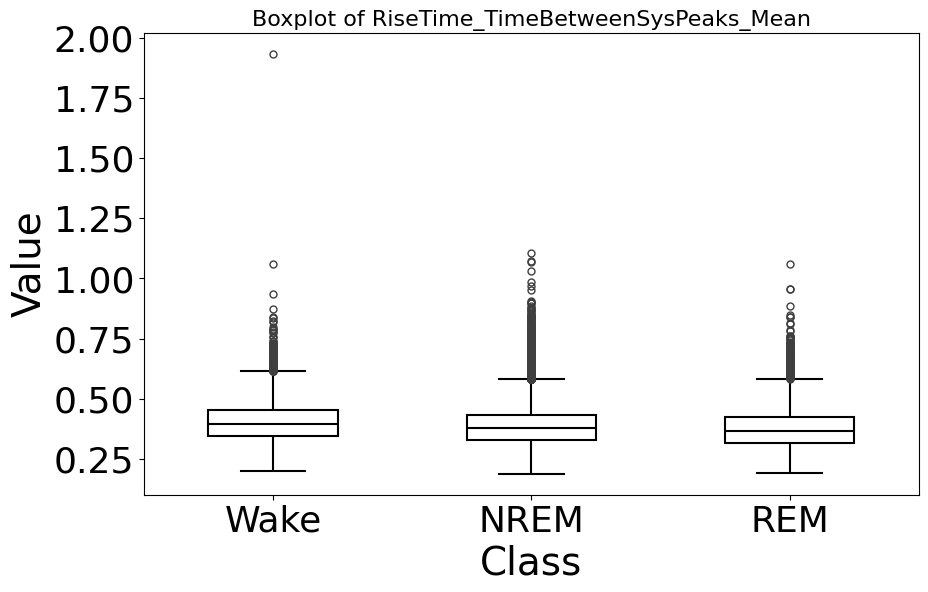

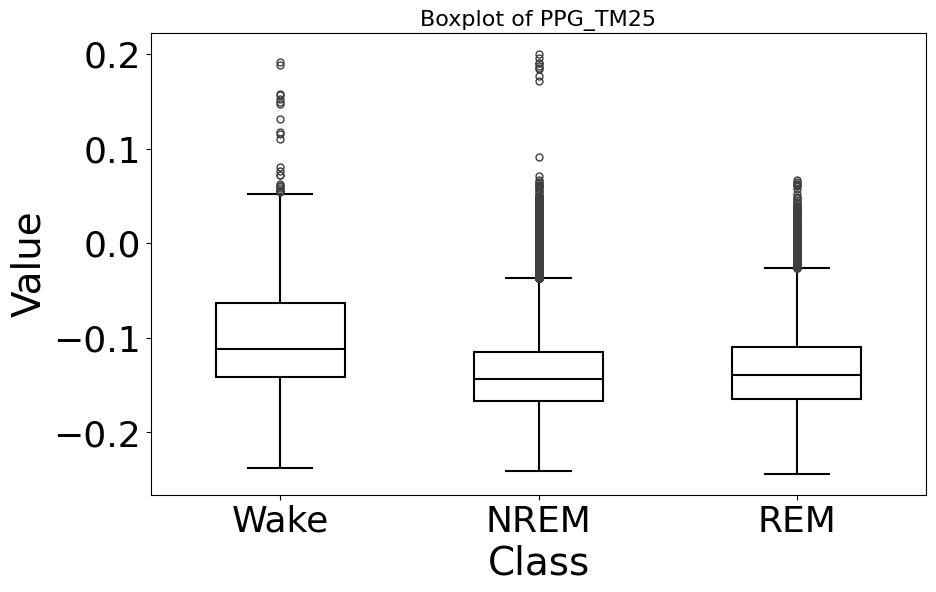

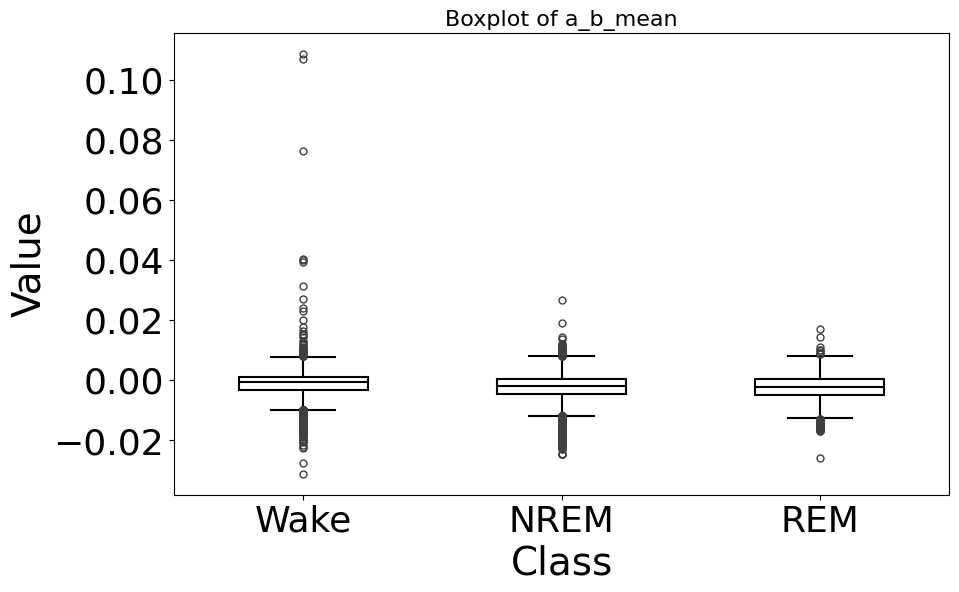

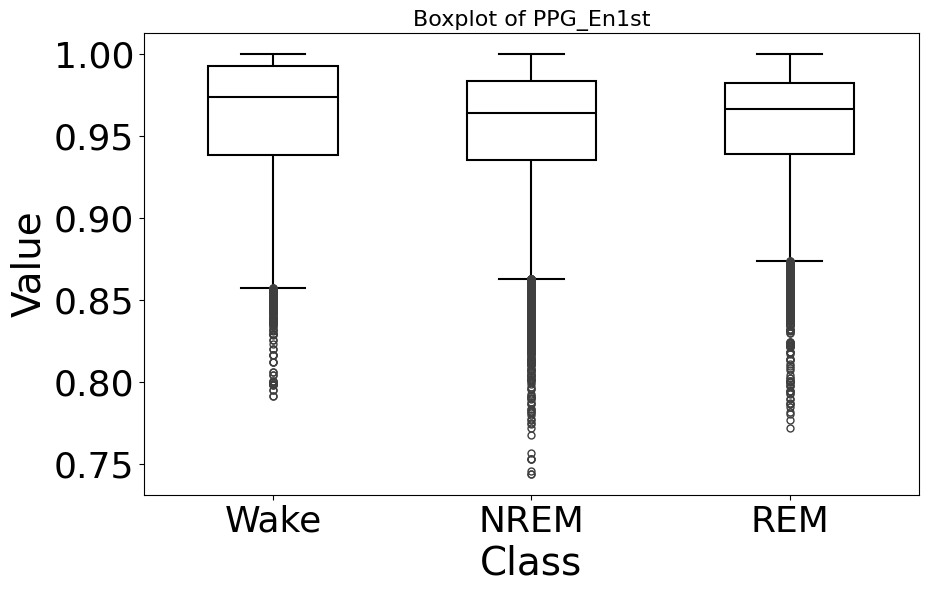

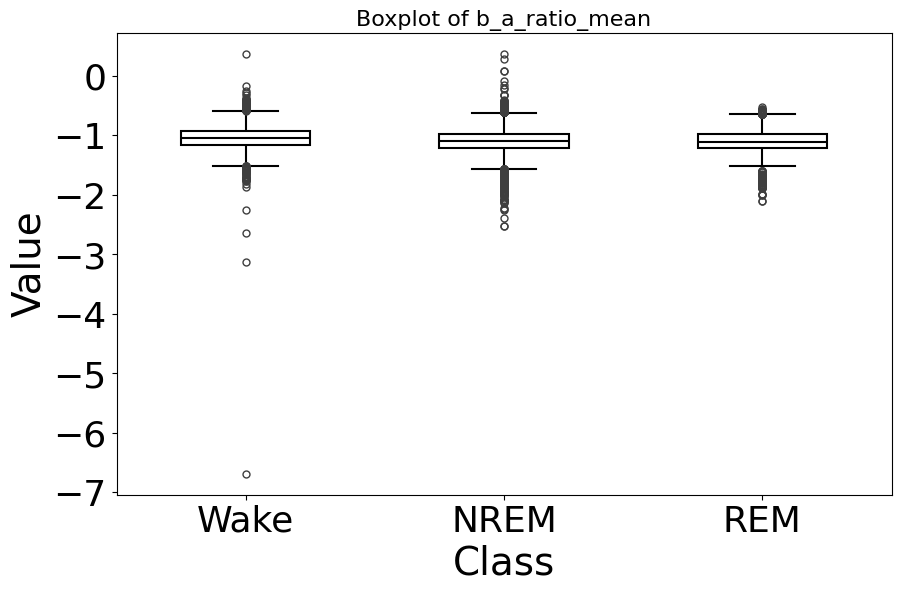

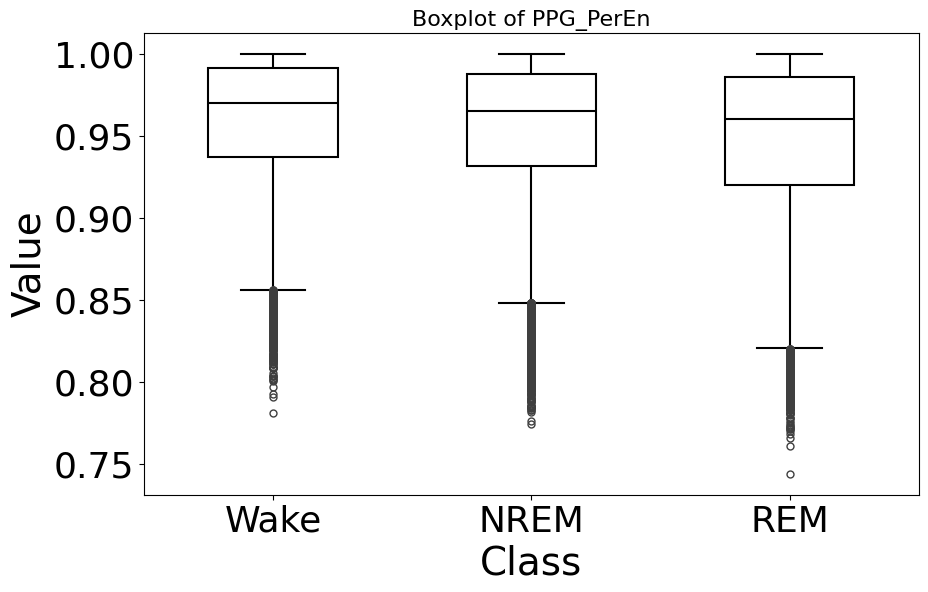

In [46]:
# First, map your 'class' column to the desired string labels
# Create a dictionary to map the class values to sleep stages
class_mapping = {0: "Wake", 1: "NREM", 2:"REM"}

# Replace the numerical class labels in your DataFrame with the string labels
top_features['class'] = top_features['class'].map(class_mapping)

feature_names = top_features.drop(columns='class').columns  # assuming 'class' column exists

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot
    sns.boxplot(x='class', y=feature, data=top_features,
                width=0.5,
                fliersize=5,
                linewidth=1.5,
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},
                whiskerprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'color': 'black'})

    plt.title(f'Boxplot of {feature}', fontsize=16, pad = 5)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)

    # Set x-ticks labels according to the class labels
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    plt.show()
